1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
np.random.seed(123456789)
import math as ma
import matplotlib.pyplot as plt
import scipy.constants as const

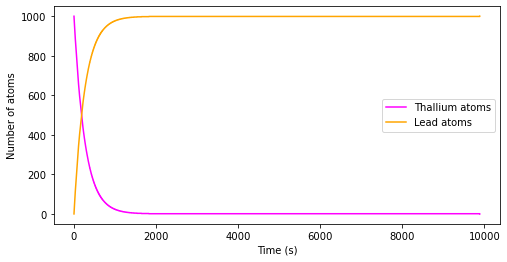

In [2]:
#1 SECOND STEPS

#Initial sample
Tl_in = 1000 
Pb_in = 0

def probability(t):
    tau = 3.052*60 #seconds
    return 1-2**(-t/tau)

Tl = [Tl_in]
Pb = [Pb_in]
i = 0
while Tl[i] != 0:
    i += 1
    Tl.append(Tl_in - int(probability(i)*1000))
    Pb.append(int(probability(i)*1000))


fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(np.arange(len(Tl)), Tl, label = 'Thallium atoms', color = 'magenta')
ax.plot(np.arange(len(Pb)), Pb, label = 'Lead atoms', color = 'orange')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of atoms');

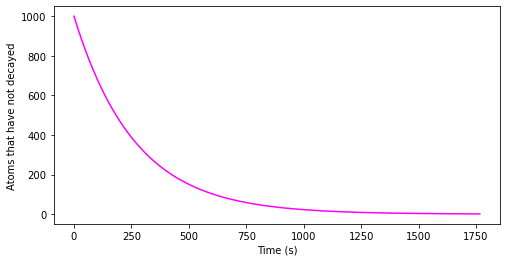

In [3]:
#INVERSE TRANSFORM METHOD

#Uniform distribution
z = np.sort(np.random.uniform(0,1,1000))

def t(z):
    tau = 3.052*60 #seconds
    return -tau*np.log2(1-z)

fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(t(z),1000-z*1000, color = 'magenta')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Atoms that have not decayed');

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [10]:
#Rutherford Scattering
Z = 79
e = 1.6e-19
E = 7.7e6*e
a0 = 5.292e-11
sigma = a0/100
N = 1000000
eps0 = 8.854e-12
mean = (0,0)

#generate the 2D gaussian
cov = [[sigma**2,0],[0,sigma**2]]
beam = np.random.multivariate_normal(mean,cov,size=N)

b = np.linalg.norm(beam,axis=1)
theta = 2*np.arctan(Z*e**2/(2*np.pi*eps0*E*b))
bounced = np.sum(theta>np.pi/2)


print('Fraction of particles that bounce back: {}'.format(str(bounced/N)))

Fraction of particles that bounce back: 0.001569


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

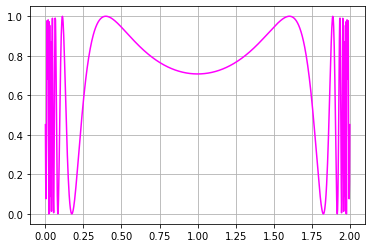

In [5]:
#Graphical representation of the function
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x), color = 'magenta')
plt.grid()

In [6]:
#MONTE CARLO INTEGRATION - HIT OR MISS

true_value = 1.4514
N = 100000
count = 0
for i in range(N):
    x = 2*np.random.random()
    y = np.random.random()
    if y<f(x): count += 1
I = 2*count/N

print('The Integral estimate with Hit or Miss is:', I)
print('The Error of the estimate is:', true_value - I, '\n')
print('----------------------------------------------------------', '\n')
    

# MONTE CARLO INTEGRATION - MEAN VALUE

summ = 0
for i in range(N):
    x=2*np.random.random()
    summ += f(x)
    I_2 = 2*summ/N

print('The Integral estimate with Mean value is: ',I_2)
print('The Error of the estimate is: ',true_value - I_2)

The Integral estimate with Hit or Miss is: 1.4469
The Error of the estimate is: 0.0044999999999999485 

---------------------------------------------------------- 

The Integral estimate with Mean value is:  1.454534220568396
The Error of the estimate is:  -0.0031342205683959623


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [7]:
#MONTE CARLO INTEGRATION - HIGH DIMENSION

def func(x,r):
    sqsum = sum([i**2 for i in x])
    return int(sqsum <= r) # 1==True,0==False

N = 100000
def integr(dim, rad=1.0):      
    # apply function to N vector, each of dim random coordinates
    values = np.zeros(N)
    for i in range(N):
        vec = np.random.rand(dim)
        values[i] = func(vec,rad)
        
    return 2**dim*np.sum(values)/N

circle_integral = integr(2)
circle_real_integral = np.pi 
sphere_integral = integr(10)
sphere_real_integral = np.pi**5/120 


print('Exact area of a unit radius circle: ', circle_real_integral)
print('Estimated Integral: ', circle_integral)
print('Error:', np.abs(circle_real_integral - circle_integral), '\n')

print('----------------------------------------------------------', '\n')
    
print('Exact area of a unit radius 10D sphere: ', sphere_real_integral)
print('Estimanted Integral of a 10D sphere: ', sphere_integral)
print('Erorr: ', sphere_real_integral - sphere_integral)


Exact area of a unit radius circle:  3.141592653589793
Estimated Integral:  3.13576
Error: 0.005832653589793235 

---------------------------------------------------------- 

Exact area of a unit radius 10D sphere:  2.550164039877345
Estimanted Integral of a 10D sphere:  2.77504
Erorr:  -0.2248759601226551


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

The estimated integral is:  0.8327859166812897


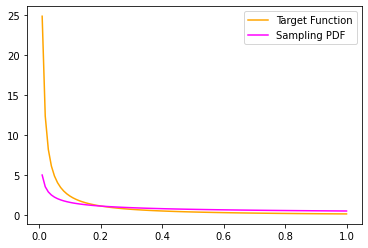

In [8]:
#MONTE CARLO INTEGRATION - IMPORTANCE SAMPLING

def func(x):
    return (x**-1/2)/(np.exp(x)+1)

def weight(x):
    return 1./(2*np.sqrt(x)) #function normalization

# Plots
x = np.linspace(0.01,1,100)
plt.plot(x,func(x),label = 'Target Function', color = 'orange')
plt.plot(x,weight(x),label = 'Sampling PDF', color = 'magenta')
plt.legend()
plt.plot()

# Importance Sampling integral
N = 10000
nmb = np.random.random(N)
I = 1.0 / N*np.sum(func(nmb) / weight(nmb))
print('The estimated integral is: ',I)